In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Specify the path to your dataset using an absolute path
data_train_path = os.path.abspath("/kaggle/input/flower-dataset/train")
data_test_path = os.path.abspath("/kaggle/input/flower-dataset/test")
data_val_path = os.path.abspath("/kaggle/input/flower-dataset/validation")

In [ ]:
img_width = 180
img_height = 180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 14160 files belonging to 5 classes.


In [ ]:
data_cat=data_train.class_names

In [ ]:
data_cat

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       validation_split=False)

Found 320 files belonging to 5 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                       image_size=(img_height, img_width),
                                                       shuffle=False,
                                                       batch_size=32,
                                                       validation_split=False)

Found 200 files belonging to 5 classes.


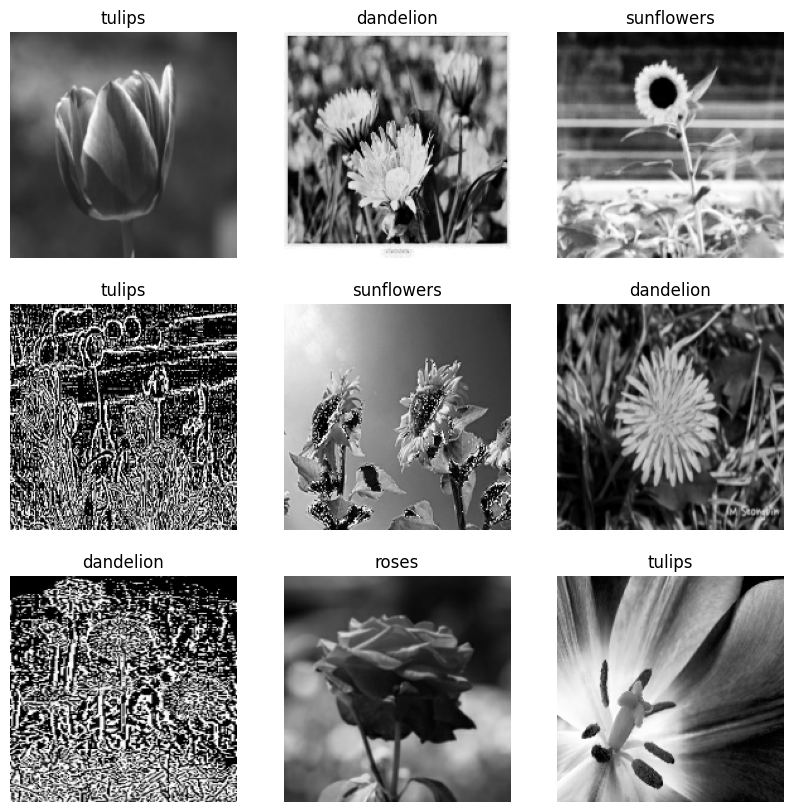

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
443/443 [==============================] - 31s 44ms/step - loss: 1.5467 - accuracy: 0.3451 - val_loss: 1.5605 - val_accuracy: 0.3281
Epoch 2/20
443/443 [==============================] - 13s 29ms/step - loss: 1.1522 - accuracy: 0.5424 - val_loss: 1.6418 - val_accuracy: 0.3313
Epoch 3/20
443/443 [==============================] - 13s 28ms/step - loss: 0.8419 - accuracy: 0.6790 - val_loss: 2.0254 - val_accuracy: 0.3438
Epoch 4/20
443/443 [==============================] - 13s 29ms/step - loss: 0.6442 - accuracy: 0.7506 - val_loss: 2.3446 - val_accuracy: 0.3719
Epoch 5/20
443/443 [==============================] - 14s 30ms/step - loss: 0.5110 - accuracy: 0.8017 - val_loss: 2.6960 - val_accuracy: 0.3969
Epoch 6/20
443/443 [==============================] - 13s 30ms/step - loss: 0.4359 - accuracy: 0.8383 - val_loss: 2.7409 - val_accuracy: 0.4156
Epoch 7/20
443/443 [==============================] - 13s 28ms/step - loss: 0.3648 - accuracy: 0.8622 - val_loss: 3.2341 - val_accuracy:

Text(0.5, 1.0, 'Loss')

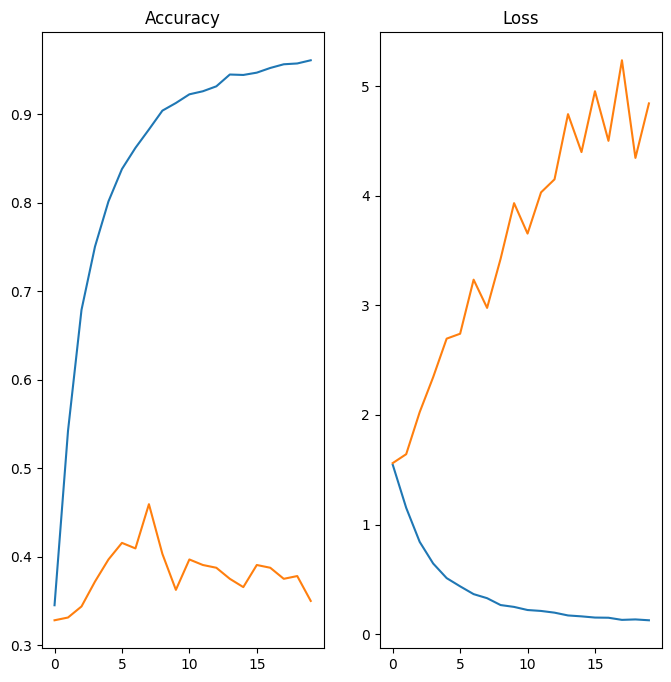

In [ ]:
epochs_size = 20
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
image = "/kaggle/input/flower-dataset/test/daisy/10172379554_b296050f82_n.jpg_bp.jpg"
image = tf.keras.utils.load_img(image,target_size= (img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 224ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Flower in image is {} with accuracy of {:0.2f}' .format(data_cat[np.argmax(score)],np.max(score)*100))

Flower in image is roses with accuracy of 99.98


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Accuracy

# Classification report

In [ ]:
from sklearn.metrics import classification_report

# Get the true labels and predicted labels for the training set
true_labels_train = []
predicted_labels_train = []

for images, labels in data_train:
    true_labels_train.extend(labels.numpy())
    predictions_train = model.predict(images)
    predicted_labels_train.extend(np.argmax(predictions_train, axis=1))

# Create classification report for the training set
class_report_train = classification_report(true_labels_train, predicted_labels_train, target_names=data_cat)
print('Classification Report - Training Set:')
print(class_report_train)


1/1 [==============================] - 0s 29ms/step
Classification Report - Training Set:
              precision    recall  f1-score   support

       daisy       0.97      0.93      0.95      2428
   dandelion       0.92      0.98      0.95      3488
       roses       0.93      0.97      0.95      2460
  sunflowers       0.92      0.96      0.94      2692
      tulips       0.99      0.89      0.94      3092

    accuracy                           0.94     14160
   macro avg       0.95      0.94      0.94     14160
weighted avg       0.95      0.94      0.94     14160



# Confusion Matrix


1/1 [==============================] - 0s 23ms/step


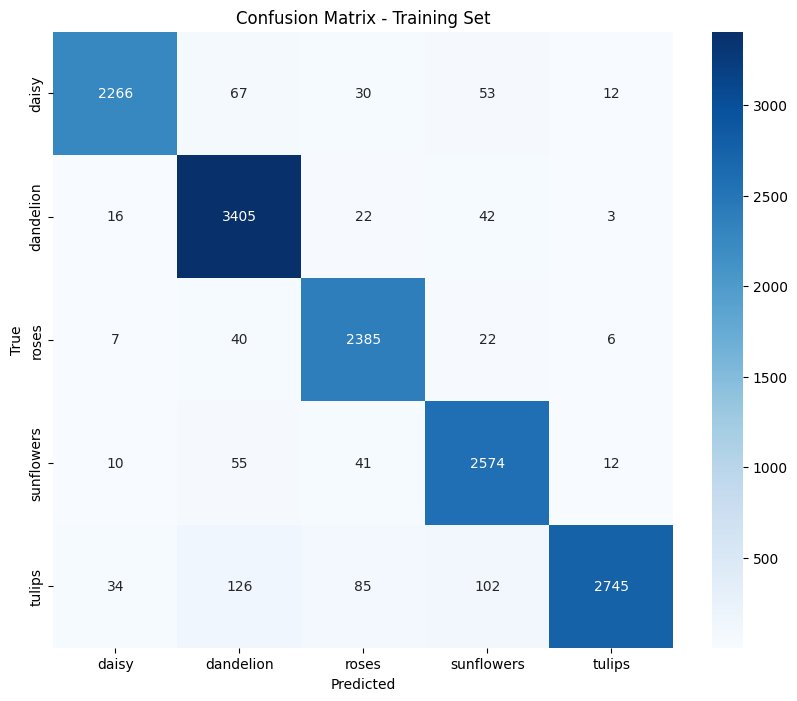

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the training set
true_labels_train = []
predicted_labels_train = []

for images, labels in data_train:
    true_labels_train.extend(labels.numpy())
    predictions_train = model.predict(images)
    predicted_labels_train.extend(np.argmax(predictions_train, axis=1))

# Create confusion matrix for the training set
cm_train = confusion_matrix(true_labels_train, predicted_labels_train)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Set')
plt.show()
